In [1]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
df = pd.read_csv('full_resample.csv').drop(columns = 'Unnamed: 0')

In [6]:
df.head()

,Season,Name,Team,G,AB,PA,H,R,RBI,HR,...,WAR,OBP+,TTO%,playerid,MVP,OPS+,traditional predictions,sabr_predictions,trad_proj,sabr_proj
0,1999,Alex Rodriguez,Mariners,129,502,572,143,110,111,42,...,4.7,103,0.362,1274,0,120,0,0,0,0
1,1999,Garret Anderson,Angels,157,620,660,188,88,80,21,...,2.4,97,0.206,2,0,90,0,0,0,0
2,1999,Robin Ventura,Mets,161,588,671,177,88,120,32,...,7.3,108,0.320,854,0,115,0,0,0,1
3,2008,Edwin Encarnacion,Reds,146,506,582,127,75,68,26,...,1.6,100,0.325,2151,0,98,0,0,0,0
4,2000,Marvin Benard,Giants,149,560,633,147,102,55,12,...,2.3,98,0.272,1382,0,78,0,0,0,0


In [7]:
no_fun = ['H', 'RBI', 'HR', 'SO', 'AVG', 'OBP', 'OPS']
sabr = ['R', 'BB', 'IBB', 'OPS+', 'wRC+', 'WAR', 'TTO%']

In [8]:
X_t = df[no_fun]
X_s = df[sabr]
y = df['MVP']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_t, y, stratify = y)

ss = StandardScaler()

In [10]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [11]:
model = Sequential()

model.add(Dense(14, activation='relu',
               input_shape = (X_train.shape[1],)))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [12]:
model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
history = model.fit(X_train_sc, y_train, epochs = 10, batch_size = 300, validation_data=(X_test_sc, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2250 samples, validate on 750 samples
Epoch 1/10
2250/2250 [==============================] - 0s 189us/step - loss: 0.7362 - acc: 0.3876 - val_loss: 0.7002 - val_acc: 0.5720
Epoch 2/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.6852 - acc: 0.6884 - val_loss: 0.6525 - val_acc: 0.8453
Epoch 3/10
2250/2250 [==============================] - 0s 15us/step - loss: 0.6384 - acc: 0.8711 - val_loss: 0.6091 - val_acc: 0.8960
Epoch 4/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.5950 - acc: 0.8956 - val_loss: 0.5692 - val_acc: 0.8987
Epoch 5/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.5550 - acc: 0.8982 - val_loss: 0.5321 - val_acc: 0.8987
Epoch 6/10
2250/2250 [==============================] - 0s 11us/step - loss: 0.5175 - acc: 0.9004 - val_loss: 0.4969 - val_acc: 0.8987
Epoch 7/10
2250/2250 [==============================] - 0s 12us/step - loss: 0.4821 - acc: 0.9

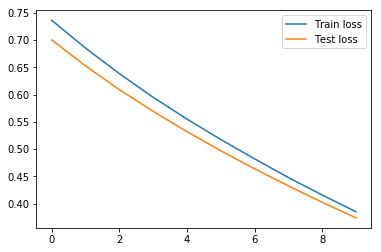

In [14]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

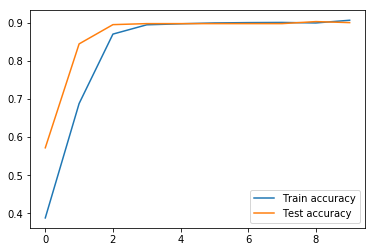

In [15]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y, stratify = y)

X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)



/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/brianschor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [17]:
model = Sequential()

model.add(Dense(14, activation='relu',
               input_shape = (X_train.shape[1],)))
model.add(Dense(14, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [18]:
history = model.fit(X_train_sc, y_train, epochs = 10, batch_size = 300, validation_data=(X_test_sc, y_test))

Train on 2250 samples, validate on 750 samples
Epoch 1/10
2250/2250 [==============================] - 1s 269us/step - loss: 0.5990 - acc: 0.7844 - val_loss: 0.5683 - val_acc: 0.8280
Epoch 2/10
2250/2250 [==============================] - 0s 12us/step - loss: 0.5614 - acc: 0.8529 - val_loss: 0.5323 - val_acc: 0.8760
Epoch 3/10
2250/2250 [==============================] - 0s 14us/step - loss: 0.5264 - acc: 0.8884 - val_loss: 0.4978 - val_acc: 0.8960
Epoch 4/10
2250/2250 [==============================] - 0s 18us/step - loss: 0.4933 - acc: 0.8978 - val_loss: 0.4649 - val_acc: 0.9027
Epoch 5/10
2250/2250 [==============================] - 0s 18us/step - loss: 0.4614 - acc: 0.9062 - val_loss: 0.4339 - val_acc: 0.9053
Epoch 6/10
2250/2250 [==============================] - 0s 21us/step - loss: 0.4320 - acc: 0.9102 - val_loss: 0.4043 - val_acc: 0.9160
Epoch 7/10
2250/2250 [==============================] - 0s 19us/step - loss: 0.4034 - acc: 0.9196 - val_loss: 0.3764 - val_acc: 0.9173
Epoch 8

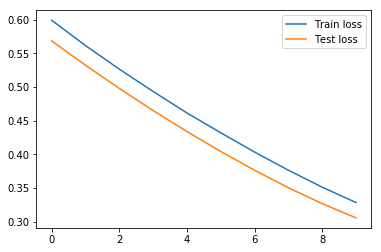

In [19]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.legend();

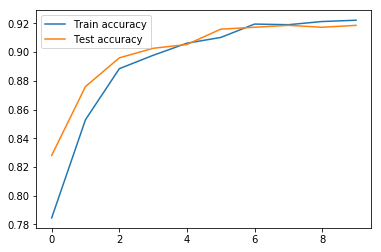

In [20]:
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.legend();